In [1]:
from shared.enums import SegmentationStrategy
from dataloaders.DynamicSegmentationDataLoader import DynamicSegmentationDataLoader
from dataloaders.ImagesAndSegmentationDataLoader import ImagesAndSegmentationDataLoader
from dataloaders.DEPRECATED_SegmentedImagesDataLoader import DEPRECTED_SegmentedImagesDataLoader
from utils.plot_utils import plot_image_grid
from utils.dataloader_utils import get_dataloder_from_strategy

Using device: cpu


# (DEPRECATED) SEGMENTATION - SegmentedDataLoader (ground truth, non dynamic)

## With background

In [2]:
# strategy = SegmentationStrategy.SEGMENTATION.value
# dataloader = get_dataloder_from_strategy(
#         strategy=strategy,
#         normalize=False,
#         keep_background=True)
# train_dataloader = dataloader.get_train_dataloder()
# batch = next(iter(train_dataloader))
# images, labels = batch
# plot_image_grid(images, "Segmented Images with background")


## Without Background

In [3]:
# strategy = SegmentationStrategy.SEGMENTATION.value
# dataloader = get_dataloder_from_strategy(
#     strategy=strategy,
#     normalize=False,
#     keep_background=False)
# train_dataloader = dataloader.get_train_dataloder()
# batch = next(iter(train_dataloader))
# images, labels = batch
# plot_image_grid(images, "Segmented Images without background")

# NO_SEGMENTATION - ImagesAndLabelsDataLoader

Using device: cpu
LOADED METADATA HAS LENGTH 7470
Metadata before split has length 7470
--Normalization-- Normalization flag set to True: Images will be normalized with z-score normalization
--Normalization-- Statistics for normalization (per channel) -> Mean: tensor([0.4850, 0.4560, 0.4060]), Variance: tensor([0.2290, 0.2240, 0.2250]), Epsilon (adjustment value): 0.01
--Data Balance-- balance_data set to True. Training data will be balanced.
--Data Balance-- The most common class is 0 with 5403 images.
--Data Balance-- The second common class is 1 with 727 images with a difference of 4676 images from the most common class.
--Data Balance (Undersampling)-- Keeping 5403 from 0 class..
--Data Balance (Undersampling)-- 0 now has 5403 images
-- Data Balance (Oversampling) -- Adding 4676 from 1 class..
-- Data Balance (Oversampling) -- Adding 4789 from 2 class..
-- Data Balance (Oversampling) -- Adding 5175 from 3 class..
-- Data Balance (Oversampling) -- Adding 5076 from 4 class..
-- Data 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


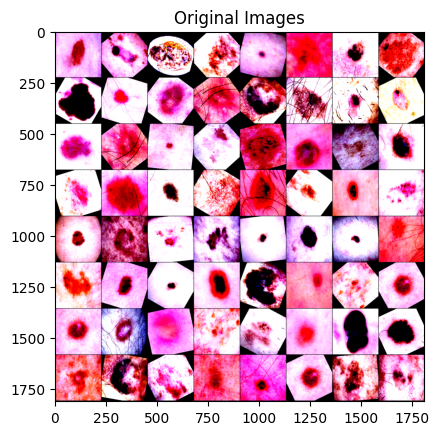

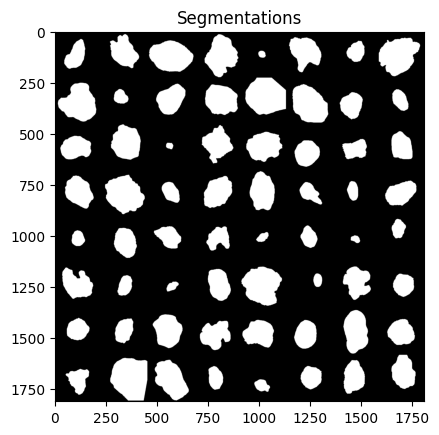

In [6]:
from constants import IMAGENET_STATISTICS


strategy = SegmentationStrategy.NO_SEGMENTATION.value
dataloader = get_dataloder_from_strategy(
    strategy=strategy,
    normalize=True,
    normalization_statistics=IMAGENET_STATISTICS)
train_dataloader = dataloader.get_train_dataloder()
batch = next(iter(train_dataloader))
images, labels, segmentations = batch
plot_image_grid(images, "Original Images")
plot_image_grid(segmentations, "Segmentations")

# DYNAMIC_SEGMENTATION - DynamicSegmentationDataLoader

Note: this is pretty bugged!

## DynamicSegmentationStrategy.OPENCV

Using device: cpu
LOADED METADATA HAS LENGTH 7470
Metadata before split has length 7470
--Normalization-- Normalization flag set to True: Images will be normalized with z-score normalization
--Normalization-- Statistics for normalization (per channel) -> Mean: tensor([0.4850, 0.4560, 0.4060]), Variance: tensor([0.2290, 0.2240, 0.2250]), Epsilon (adjustment value): 0.01
--Data Balance-- balance_data set to True. Training data will be balanced.
--Data Balance-- The most common class is 0 with 5403 images.
--Data Balance-- The second common class is 1 with 727 images with a difference of 4676 images from the most common class.
--Data Balance (Undersampling)-- Keeping 5403 from 0 class..
--Data Balance (Undersampling)-- 0 now has 5403 images
-- Data Balance (Oversampling) -- Adding 4676 from 1 class..
-- Data Balance (Oversampling) -- Adding 4789 from 2 class..
-- Data Balance (Oversampling) -- Adding 5175 from 3 class..
-- Data Balance (Oversampling) -- Adding 5076 from 4 class..
-- Data 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


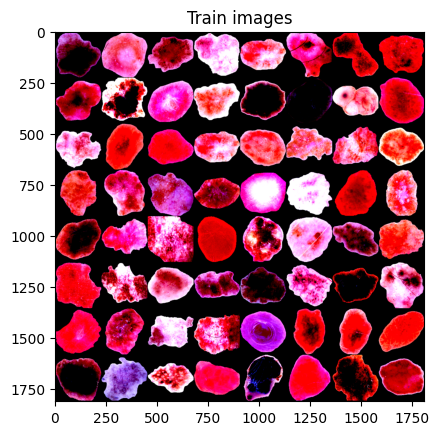

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


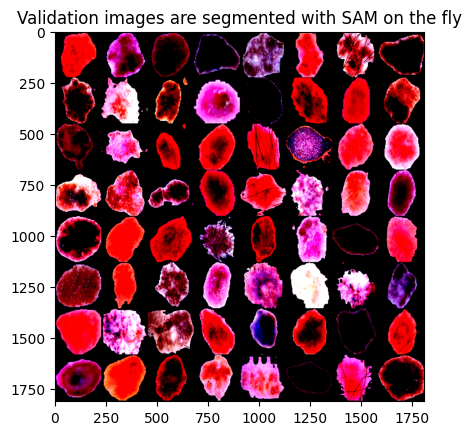

In [8]:
from shared.enums import DynamicSegmentationStrategy


strategy = SegmentationStrategy.DYNAMIC_SEGMENTATION.value
dataloader = get_dataloder_from_strategy(
    strategy=strategy,
    dynamic_segmentation_strategy=DynamicSegmentationStrategy.SAM.value,
    normalize=True,
    normalization_statistics=IMAGENET_STATISTICS,
    keep_background=False)
train_dataloader = dataloader.get_train_dataloder()
val_dataloader, _ = dataloader.get_val_test_dataloader()
batch = next(iter(train_dataloader))
images, labels = batch
# NOTE: because the dataloader is bugges AF, also the train images are segmented with OpenCV on the fly, while they should be segmented with the ground truth
plot_image_grid(images, "Train images") 
batch = next(iter(val_dataloader))
images, labels = batch
plot_image_grid(images, "Validation images are segmented with SAM on the fly")